# 일사량데이터 
---

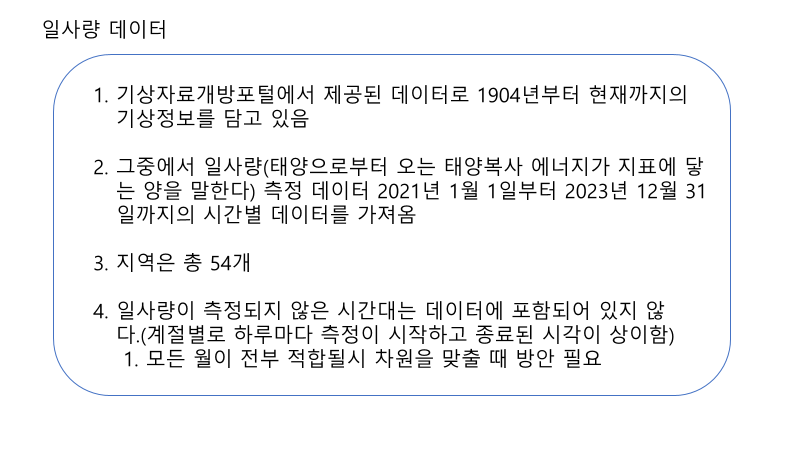

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [8]:
s23 = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task1_lee\\data\\s2023.csv',encoding='cp949')
s22 = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task1_lee\\data\\s2022.csv',encoding='cp949')
s21 = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task1_lee\\data\\s2021.csv',encoding='cp949')

In [30]:
df_all =pd.concat([s21,s22,s23],axis=0)
df_all= df_all.set_index('일시').drop(labels=['지점'],axis=1)

In [40]:
region= [ i for i in set(df_all['지점명'].values)]
len(region)

54

In [213]:
region[12] # 2021년주기 이상함

'동두천'

In [233]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
lst = []
for  i  in range(len(months)):
    mm = df_all[df_all['지점명'] == region[40]].loc[f'2023-{months[i]}-15 04:00':f'2023-{months[i]}-15 24:00']
    lst.append(mm)
    
    
{months[i]+'월':len(lst[i]) for i in range(len(lst))}

{'01월': 11,
 '02월': 12,
 '03월': 13,
 '04월': 15,
 '05월': 15,
 '06월': 15,
 '07월': 15,
 '08월': 15,
 '09월': 13,
 '10월': 12,
 '11월': 11,
 '12월': 11}

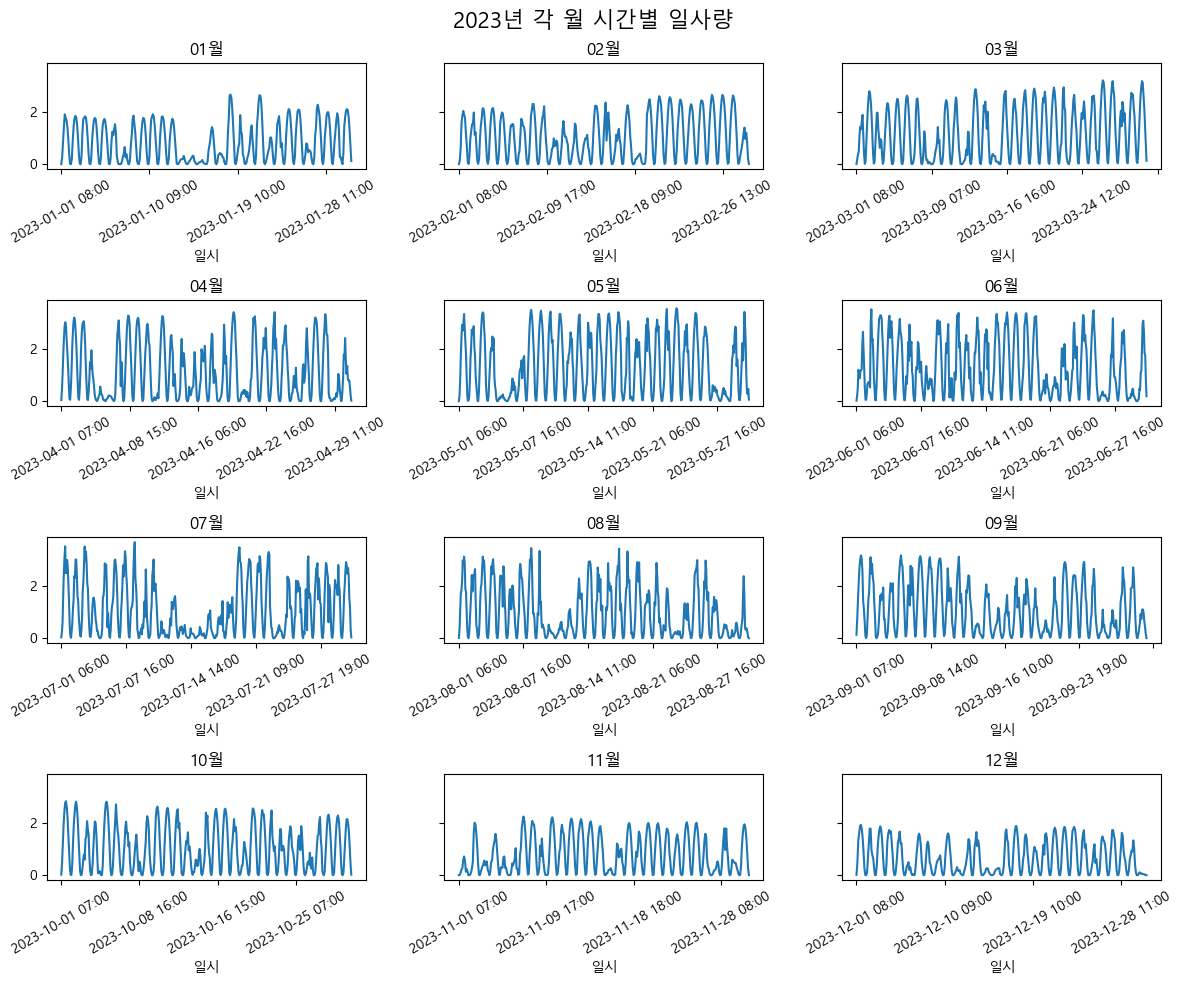

In [206]:

fig, axes = plt.subplots(4, 3, figsize=(12, 10), sharey=True)
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i, ax in enumerate(axes.flat):
    month_data = df_all[df_all['지점명'] == region[12]].loc[f'2023-{months[i]}-01 00:00':f'2023-{months[i]}-31 00:00']
    month_data.plot(ax=ax)
    ax.tick_params(axis='x', rotation=30)
    #ax.legend(loc='lower right', bbox_to_anchor=(1.0, 1.0))
    ax.legend().set_visible(False) 
    ax.set_title(f"{months[i]}월")
fig.suptitle("2023년 각 월 시간별 일사량", fontsize=16)
plt.tight_layout()

plt.show()


---

In [223]:
a = [df_all[df_all['지점명'] == region[i]] for i in range(len(region))]
dct = {region[i]:a[i].iloc[:,[1]] for i in range(len(region))}

In [224]:
dct[region[0]] # 딕셔너리화 region 변수에 따라 각 해당하는 시간대별 일사량 데이터프레임 호출

,일사(MJ/m2)
일시,
2021-01-01 08:00,0.01
2021-01-01 09:00,0.37
2021-01-01 10:00,0.97
2021-01-01 11:00,1.48
2021-01-01 12:00,1.76
...,...
2023-12-30 14:00,0.12
2023-12-30 15:00,0.26
2023-12-30 16:00,0.17
